In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from io import BytesIO

In [28]:
path= os.walk('./images/Images_of_Waste/test')
categ= ['AluCan', 'Glass', 'HDPEM', 'PET']
test_m= keras.preprocessing.image_dataset_from_directory(directory='./images/Images_of_Waste/test',labels='inferred', label_mode='categorical', color_mode='rgb', image_size=(50,50))
train_m= keras.preprocessing.image_dataset_from_directory(directory='./images/Images_of_Waste/train',labels='inferred', label_mode='categorical', color_mode='rgb', image_size=(50,50) )

Found 4828 files belonging to 4 classes.
Found 4797 files belonging to 4 classes.


In [5]:
print(test_m.class_names)

['AluCan', 'Glass', 'HDPEM', 'PET']


In [34]:
model = keras.Sequential([
    Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(50,50, 3)),
    Conv2D(64, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (2,2), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4,  activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


#his = model.fit(,, batch_size=32, epochs=5, validation_split=0.2)

#model.evaluate(x_test, y_test_cat)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 50, 50, 32)        2432      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 25, 25, 64)        16448     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)              

In [36]:
model.fit(train_m, batch_size=32, epochs=10)

Epoch 1/10
150/150 [==============================] - 68s 447ms/step - loss: 0.4525 - accuracy: 0.8272
Epoch 2/10
150/150 [==============================] - 68s 447ms/step - loss: 0.3564 - accuracy: 0.8685
Epoch 3/10
150/150 [==============================] - 68s 447ms/step - loss: 0.3291 - accuracy: 0.8808
Epoch 4/10
150/150 [==============================] - 68s 446ms/step - loss: 0.2338 - accuracy: 0.9160
Epoch 5/10
150/150 [==============================] - 68s 448ms/step - loss: 0.1740 - accuracy: 0.9393
Epoch 6/10
150/150 [==============================] - 68s 446ms/step - loss: 0.2071 - accuracy: 0.9256
Epoch 7/10
150/150 [==============================] - 68s 446ms/step - loss: 0.1764 - accuracy: 0.9398
Epoch 8/10
150/150 [==============================] - 68s 446ms/step - loss: 0.1810 - accuracy: 0.9387
Epoch 9/10
150/150 [==============================] - 68s 446ms/step - loss: 0.1519 - accuracy: 0.9477
Epoch 10/10
150/150 [==============================] - 68s 446ms/step - l

In [38]:
model.save(
    './models',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

INFO:tensorflow:Assets written to: ./models\assets


In [50]:
img = Image.open('./images/Images_of_Waste/test/Glass/Glass15.JPG')

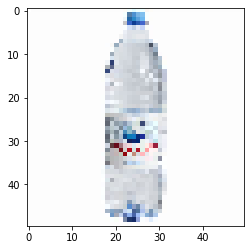

In [88]:
img=keras.preprocessing.image.load_img('./images/bottle.jpg', grayscale=False, color_mode="rgb", target_size=(50,50), interpolation="nearest")
plt.imshow(img)
input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])

In [89]:
result=model.predict(input_arr)
m= 0
out= 0
for i in result:
    for g in range(len(i)):
        if i[g]>m:
            m=i[g]
            out=g
if out==0:
    print('AluCan')
elif out==1:
    print('Glass')
elif out==2:
    print('HDPEM')
elif out==3:
    print('PET')
else:
    print('Error')

PET
